In [ ]:
import tensorflow as tf

In [ ]:
import os

In [ ]:
data_dir = 'drive/MyDrive/Dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpus = tf.config.experimental.list_logical_devices('GPU')
gpus

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical')
scaled = False

Found 500 files belonging to 5 classes.


In [ ]:
data_class_names = data.class_names
data_class_names

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [ ]:
if scaled == False :
    data = data.map(lambda x, y: (x/255,y))
    scaled = True

In [ ]:
data_iter = data.as_numpy_iterator()

In [ ]:
batch = data_iter.next()
print('Shape:', batch[0].shape, batch[1].shape)
batch

Shape: (32, 256, 256, 3) (32, 5)


(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
print('length data:', len(data))
train_size = int(len(data)*.7)
print('train_size:', train_size)
val_size = int(len(data)*.2)
print('val_size:', val_size)
test_size = int(len(data)*.1) + 1
print('test_size:', test_size)
print ('tot:', train_size + val_size + test_size)

length data: 16
train_size: 11
val_size: 3
test_size: 2
tot: 16


In [ ]:
train_data = data.take(train_size)
print('=======train_data=======')
print('length', len(train_data))
display(train_data)
val_data = data.skip(train_size).take(val_size)
print('=======val_data=======')
print('length', len(val_data))
display(val_data)
test_data = data.skip(train_size + val_size).take(test_size)
print('=======test_data=======')
print('length', len(test_data))
display(test_data)

=======train_data=======
length 11


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

=======val_data=======
length 3


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

=======test_data=======
length 2


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())          
                   
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
                   
model.add(Flatten())
                   
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [ ]:
result = model.fit(train_data, epochs=25, validation_data=val_data, callbacks=[tensorboard])

Epoch 1/25
11/11 [==============================] - 38s 2s/step - loss: 2.2137 - accuracy: 0.1903 - val_loss: 1.6081 - val_accuracy: 0.2500
Epoch 2/25
11/11 [==============================] - 5s 383ms/step - loss: 1.6079 - accuracy: 0.3040 - val_loss: 1.6091 - val_accuracy: 0.1979
Epoch 3/25
11/11 [==============================] - 5s 362ms/step - loss: 1.6086 - accuracy: 0.2244 - val_loss: 1.6081 - val_accuracy: 0.2188
Epoch 4/25
11/11 [==============================] - 5s 384ms/step - loss: 1.6084 - accuracy: 0.1989 - val_loss: 1.6060 - val_accuracy: 0.2500
Epoch 5/25
11/11 [==============================] - 5s 384ms/step - loss: 1.6043 - accuracy: 0.2784 - val_loss: 1.5930 - val_accuracy: 0.3125
Epoch 6/25
11/11 [==============================] - 5s 360ms/step - loss: 1.5804 - accuracy: 0.3324 - val_loss: 1.5336 - val_accuracy: 0.3646
Epoch 7/25
11/11 [==============================] - 5s 362ms/step - loss: 1.5241 - accuracy: 0.4489 - val_loss: 1.4771 - val_accuracy: 0.4375
Epoch 8/

In [ ]:
result.history

{'accuracy': [0.19034090638160706,
  0.30397728085517883,
  0.2244318127632141,
  0.19886364042758942,
  0.27840909361839294,
  0.3323863744735718,
  0.4488636255264282,
  0.40625,
  0.5482954382896423,
  0.5397727489471436,
  0.7215909361839294,
  0.8039772510528564,
  0.8494318127632141,
  0.8948863744735718,
  0.9090909361839294,
  0.9403409361839294,
  0.9772727489471436,
  0.9971590638160706,
  0.9943181872367859,
  0.9971590638160706,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [2.2136917114257812,
  1.607927680015564,
  1.608575463294983,
  1.6083893775939941,
  1.6043179035186768,
  1.5803656578063965,
  1.524062991142273,
  1.428188681602478,
  1.3103655576705933,
  1.2440415620803833,
  0.9731993079185486,
  0.7120703458786011,
  0.5204216241836548,
  0.37796303629875183,
  0.30793139338493347,
  0.279705286026001,
  0.18022440373897552,
  0.11001480370759964,
  0.06938440352678299,
  0.044067393988370895,
  0.02408708445727825,
  0.016556791961193085,
  0.01168085914105177,

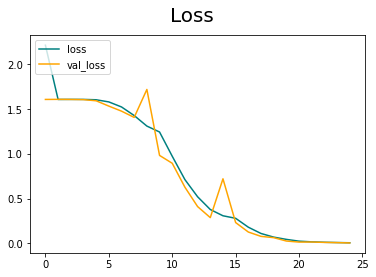

In [ ]:
def loss_fig(result):
    fig = plt.figure()
    plt.plot(result.history['loss'], color='teal', label='loss')
    plt.plot(result.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()
loss_fig(result)

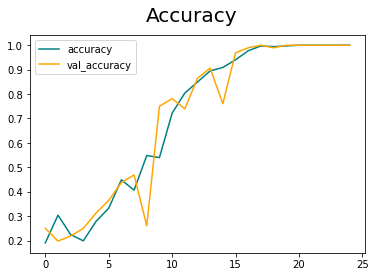

In [ ]:
def acc_fig(result):
    fig = plt.figure()
    plt.plot(result.history['accuracy'], color='teal', label='accuracy')
    plt.plot(result.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()
acc_fig(result)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print('Precision:', pre.result().numpy())
print('Recall:', re.result().numpy())
print('Acc:', acc.result().numpy())

Precision: 1.0
Recall: 1.0
Acc: 1.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def print_class(res):
    return data_class_names[res.argmax()]

In [ ]:
def test_yours(dire):
    img = cv2.imread(dire)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    print(print_class(yhat))

In [ ]:
test_yours(data_dir + '/Ala_Idris/Ala_Idris (15).png')

Ala_Idris


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'modelwithoutaug.h5'))

In [ ]:
#load_model(os.path.join('models', 'modelwithoutaug.h5'))

# AUG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import pandas as pd

In [ ]:
os.listdir(data_dir)

['Nazli', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Ak']

In [ ]:
def get_images():
    im = []
    for idx, cls in enumerate(os.listdir(data_dir)):
        path = os.path.join(data_dir, cls)
        for img_dir in os.listdir(path):
            img = os.path.join(path, img_dir)
            im += [[img,cls]]
    return np.array(im)

In [ ]:
data = get_images()

In [ ]:
D = pd.DataFrame(data)
D.columns = ['filename','class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_trainval, data_test, labels_trainval, labels_test = train_test_split(D['filename'], D['class'], test_size=0.20)

In [ ]:
pd_trainval =pd.concat([data_trainval,labels_trainval],axis=1)
pd_trainval.head()

,filename,class
272,drive/MyDrive/Dataset/Buzgulu/Buzgulu (89).png,Buzgulu
78,drive/MyDrive/Dataset/Nazli/Nazli (84).png,Nazli
433,drive/MyDrive/Dataset/Ak/Ak (51).png,Ak
84,drive/MyDrive/Dataset/Nazli/Nazli (75).png,Nazli
465,drive/MyDrive/Dataset/Ak/Ak (8).png,Ak


In [ ]:
pd_test =pd.concat([data_test,labels_test],axis=1)
pd_test.head()

,filename,class
380,drive/MyDrive/Dataset/Dimnit/Dimnit (94).png,Dimnit
294,drive/MyDrive/Dataset/Buzgulu/Buzgulu (94).png,Buzgulu
19,drive/MyDrive/Dataset/Nazli/Nazli (42).png,Nazli
233,drive/MyDrive/Dataset/Buzgulu/Buzgulu (3).png,Buzgulu
347,drive/MyDrive/Dataset/Dimnit/Dimnit (13).png,Dimnit


In [ ]:
print('=======data_trainval=======')
print('length', len(data_trainval))
print('=======test_data=======')
print('length', len(data_test))

=======data_trainval=======
length 400
=======test_data=======
length 100


In [ ]:
trainval_gen = ImageDataGenerator(
    rotation_range = 35,
    zoom_range = 0.15,
    rescale=1 / 255.0,
    brightness_range=[0.8,1.3],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    fill_mode='constant')

In [ ]:
test_gen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
train_generator = trainval_gen.flow_from_dataframe(
    dataframe=pd_trainval,
    class_mode="categorical",
    subset='training',
    target_size=(256,256),
    shuffle=True
)

Found 320 validated image filenames belonging to 5 classes.


In [ ]:
valid_generator = trainval_gen.flow_from_dataframe(
    dataframe=pd_trainval,
    class_mode="categorical",
    subset='validation',
    target_size=(256,256),
    shuffle=True
)

Found 80 validated image filenames belonging to 5 classes.


In [ ]:
test_generator = test_gen.flow_from_dataframe(
    dataframe=pd_test,
    batch_size=1,
    target_size=(256,256),
    class_mode=None,
    shuffle=False,
)

Found 100 validated image filenames.


In [ ]:
def TryPitch():
    data = get_images()
    D = pd.DataFrame(data)
    D.columns = ['filename','class']
    data_trainval, data_test, labels_trainval, labels_test = train_test_split(D['filename'], D['class'], test_size=0.20)
    pd_trainval =pd.concat([data_trainval,labels_trainval],axis=1)
    pd_test =pd.concat([data_test,labels_test],axis=1)
    trainval_gen = ImageDataGenerator(
        rotation_range = 40,
        zoom_range = 0.15,
        rescale=1 / 255.0,
        brightness_range=[0.5,1.5],
        channel_shift_range=0.5,
        height_shift_range=0.15,
        width_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2,
        cval=0.0,
        fill_mode='constant')
    test_gen = ImageDataGenerator(rescale=1 / 255.0)
    train_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='training',
        target_size=(256,256),
        shuffle=True)
    valid_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='validation',
        target_size=(256,256),
        shuffle=True)
    test_generator = test_gen.flow_from_dataframe(
        dataframe=pd_test,
        batch_size=1,
        target_size=(256,256),
        class_mode="categorical",
        shuffle=False)
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D())          

    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))

    model.add(Dense(5, activation='softmax'))
    model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    display(model.summary())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
    
    result = model.fit(train_generator, epochs=50, validation_data=valid_generator, callbacks=[tensorboard], 
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size)
    loss_fig(result)
    acc_fig(result)

    pre = Precision()
    re = Recall()
    acc = CategoricalAccuracy()
    for _ in range(len(data_test)):
        iterd = test_generator.next()
        yhat = model.predict(iterd[0])
        pre.update_state(iterd[1], yhat)
        re.update_state(iterd[1], yhat)
        acc.update_state(iterd[1], yhat)
    print('Precision:', pre.result().numpy())
    print('Recall:', re.result().numpy())
    print('Acc:', acc.result().numpy())
    return model

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatte

None

Epoch 1/50
10/10 [==============================] - 11s 1s/step - loss: 2.0170 - accuracy: 0.1781 - val_loss: 1.6197 - val_accuracy: 0.1875
Epoch 2/50
10/10 [==============================] - 9s 940ms/step - loss: 1.6119 - accuracy: 0.1781 - val_loss: 1.6101 - val_accuracy: 0.2344
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 1.6095 - accuracy: 0.1969 - val_loss: 1.6098 - val_accuracy: 0.2188
Epoch 4/50
10/10 [==============================] - 10s 1s/step - loss: 1.6094 - accuracy: 0.1969 - val_loss: 1.6084 - val_accuracy: 0.2812
Epoch 5/50
10/10 [==============================] - 10s 972ms/step - loss: 1.6094 - accuracy: 0.1969 - val_loss: 1.6104 - val_accuracy: 0.2500
Epoch 6/50
10/10 [==============================] - 10s 1s/step - loss: 1.6093 - accuracy: 0.1969 - val_loss: 1.6109 - val_accuracy: 0.2500
Epoch 7/50
10/10 [==============================] - 9s 932ms/step - loss: 1.6092 - accuracy: 0.1937 - val_loss: 1.6116 - val_accuracy: 0.1406
Epoch 8/50
10

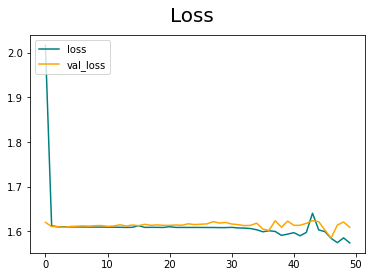

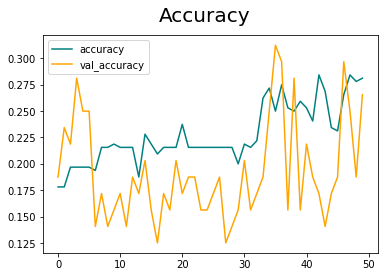

Precision: 0.0
Recall: 0.0
Acc: 0.31


In [ ]:
model_auged = TryPitch()

In [ ]:
def TryPitch():
    data = get_images()
    D = pd.DataFrame(data)
    D.columns = ['filename','class']
    data_trainval, data_test, labels_trainval, labels_test = train_test_split(D['filename'], D['class'], test_size=0.20)
    pd_trainval =pd.concat([data_trainval,labels_trainval],axis=1)
    pd_test =pd.concat([data_test,labels_test],axis=1)
    trainval_gen = ImageDataGenerator(
        rotation_range = 40,
        zoom_range = 0.15,
        rescale=1 / 255.0,
        brightness_range=[0.5,1.5],
        channel_shift_range=0.5,
        height_shift_range=0.15,
        width_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2,
        cval=0.0,
        fill_mode='constant')
    test_gen = ImageDataGenerator(rescale=1 / 255.0)
    train_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='training',
        target_size=(256,256),
        shuffle=True)
    valid_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='validation',
        target_size=(256,256),
        shuffle=True)
    test_generator = test_gen.flow_from_dataframe(
        dataframe=pd_test,
        batch_size=1,
        target_size=(256,256),
        class_mode="categorical",
        shuffle=False)
    
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D())          

    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='relu'))

    model.add(Dense(5, activation='softmax'))
    model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    display(model.summary())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
    
    result = model.fit(train_generator, epochs=50, validation_data=valid_generator, callbacks=[tensorboard], 
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size)
    loss_fig(result)
    acc_fig(result)

    pre = Precision()
    re = Recall()
    acc = CategoricalAccuracy()
    for _ in range(len(data_test)):
        iterd = test_generator.next()
        yhat = model.predict(iterd[0])
        pre.update_state(iterd[1], yhat)
        re.update_state(iterd[1], yhat)
        acc.update_state(iterd[1], yhat)
    print('Precision:', pre.result().numpy())
    print('Recall:', re.result().numpy())
    print('Acc:', acc.result().numpy())
    return model

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 flatt

None

Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 2.8650 - accuracy: 0.2000 - val_loss: 1.6097 - val_accuracy: 0.2188
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 1.6097 - accuracy: 0.1969 - val_loss: 1.6087 - val_accuracy: 0.2656
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 1.6091 - accuracy: 0.2219 - val_loss: 1.6100 - val_accuracy: 0.1562
Epoch 4/50
10/10 [==============================] - 11s 1s/step - loss: 1.6087 - accuracy: 0.2313 - val_loss: 1.6085 - val_accuracy: 0.2031
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 1.6090 - accuracy: 0.2188 - val_loss: 1.6115 - val_accuracy: 0.1875
Epoch 6/50
10/10 [==============================] - 10s 997ms/step - loss: 1.6097 - accuracy: 0.2250 - val_loss: 1.6105 - val_accuracy: 0.1719
Epoch 7/50
10/10 [==============================] - 10s 999ms/step - loss: 1.6086 - accuracy: 0.2188 - val_loss: 1.6079 - val_accuracy: 0.1875
Epoch 8/50
10/

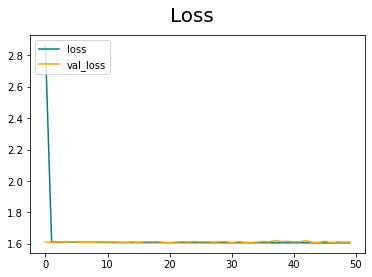

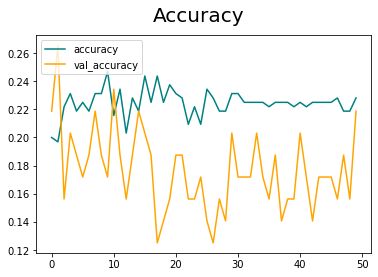

Precision: 0.0
Recall: 0.0
Acc: 0.15


In [ ]:
model_auged = TryPitch()

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
def TryPitch():
    data = get_images()
    D = pd.DataFrame(data)
    D.columns = ['filename','class']
    data_trainval, data_test, labels_trainval, labels_test = train_test_split(D['filename'], D['class'], test_size=0.20)
    pd_trainval =pd.concat([data_trainval,labels_trainval],axis=1)
    pd_test =pd.concat([data_test,labels_test],axis=1)
    trainval_gen = ImageDataGenerator(
        rotation_range = 40,
        zoom_range = 0.15,
        rescale=1 / 255.0,
        brightness_range=[0.5,1.5],
        channel_shift_range=0.5,
        height_shift_range=0.15,
        width_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2,
        cval=0.0,
        fill_mode='constant')
    test_gen = ImageDataGenerator(rescale=1 / 255.0)
    train_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='training',
        target_size=(256,256),
        shuffle=True)
    valid_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='validation',
        target_size=(256,256),
        shuffle=True)
    test_generator = test_gen.flow_from_dataframe(
        dataframe=pd_test,
        batch_size=1,
        target_size=(256,256),
        class_mode="categorical",
        shuffle=False)
    
    model = MobileNetV2(input_shape=(256, 256, 3),
                include_top=True,
                weights = None, 
                classes=5)
    model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    display(model.summary())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
    
    result = model.fit(train_generator, epochs=50, validation_data=valid_generator, callbacks=[tensorboard])
    loss_fig(result)
    acc_fig(result)

    pre = Precision()
    re = Recall()
    acc = CategoricalAccuracy()
    for _ in range(len(data_test)):
        iterd = test_generator.next()
        yhat = model.predict(iterd[0])
        pre.update_state(iterd[1], yhat)
        re.update_state(iterd[1], yhat)
        acc.update_state(iterd[1], yhat)
    print('Precision:', pre.result().numpy())
    print('Recall:', re.result().numpy())
    print('Acc:', acc.result().numpy())
    return model

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.
Model: "mobilenetv2_1.00_256"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  

None

Epoch 1/50
10/10 [==============================] - 21s 1s/step - loss: 1.7533 - accuracy: 0.2156 - val_loss: 1.6100 - val_accuracy: 0.1875
Epoch 2/50
10/10 [==============================] - 15s 2s/step - loss: 1.7614 - accuracy: 0.2281 - val_loss: 1.6106 - val_accuracy: 0.1750
Epoch 3/50
10/10 [==============================] - 12s 1s/step - loss: 1.7577 - accuracy: 0.1875 - val_loss: 1.6104 - val_accuracy: 0.1750
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 1.6058 - accuracy: 0.2250 - val_loss: 1.6112 - val_accuracy: 0.1750
Epoch 5/50
10/10 [==============================] - 12s 1s/step - loss: 1.6397 - accuracy: 0.2688 - val_loss: 1.6108 - val_accuracy: 0.1750
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 1.6669 - accuracy: 0.2031 - val_loss: 1.6108 - val_accuracy: 0.1750
Epoch 7/50
10/10 [==============================] - 11s 1s/step - loss: 1.6787 - accuracy: 0.2156 - val_loss: 1.6111 - val_accuracy: 0.1750
Epoch 8/50
10/10 [==

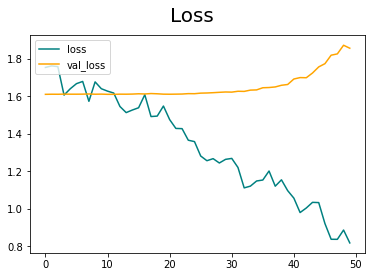

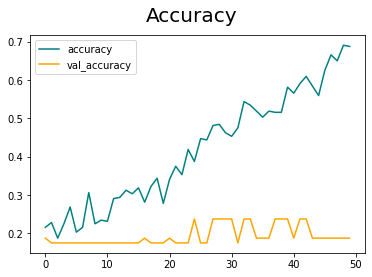

Precision: 0.0
Recall: 0.0
Acc: 0.21


In [ ]:
model.mob = TryPitch()

In [ ]:
def TryPitch():
    data = get_images()
    D = pd.DataFrame(data)
    D.columns = ['filename','class']
    data_trainval, data_test, labels_trainval, labels_test = train_test_split(D['filename'], D['class'], test_size=0.20)
    pd_trainval =pd.concat([data_trainval,labels_trainval],axis=1)
    pd_test =pd.concat([data_test,labels_test],axis=1)
    trainval_gen = ImageDataGenerator(
        rescale=1 / 255.0,
        validation_split=0.2,)
    test_gen = ImageDataGenerator(rescale=1 / 255.0)
    train_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='training',
        target_size=(256,256),
        shuffle=True)
    valid_generator = trainval_gen.flow_from_dataframe(
        dataframe=pd_trainval,
        class_mode="categorical",
        subset='validation',
        target_size=(256,256),
        shuffle=True)
    test_generator = test_gen.flow_from_dataframe(
        dataframe=pd_test,
        batch_size=1,
        target_size=(256,256),
        class_mode="categorical",
        shuffle=False)
    
    model = MobileNetV2(input_shape=(256, 256, 3),
                include_top=True,
                weights = None, 
                classes=5)
    model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    display(model.summary())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
    
    result = model.fit(train_generator, epochs=50, validation_data=valid_generator, callbacks=[tensorboard])
    loss_fig(result)
    acc_fig(result)

    pre = Precision()
    re = Recall()
    acc = CategoricalAccuracy()
    for _ in range(len(data_test)):
        iterd = test_generator.next()
        yhat = model.predict(iterd[0])
        pre.update_state(iterd[1], yhat)
        re.update_state(iterd[1], yhat)
        acc.update_state(iterd[1], yhat)
    print('Precision:', pre.result().numpy())
    print('Recall:', re.result().numpy())
    print('Acc:', acc.result().numpy())
    return model

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.
Model: "mobilenetv2_1.00_256"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  

None

Epoch 1/50
10/10 [==============================] - 11s 524ms/step - loss: 1.5655 - accuracy: 0.3313 - val_loss: 1.6181 - val_accuracy: 0.1875
Epoch 2/50
10/10 [==============================] - 5s 487ms/step - loss: 1.2239 - accuracy: 0.5469 - val_loss: 1.6127 - val_accuracy: 0.1875
Epoch 3/50
10/10 [==============================] - 4s 442ms/step - loss: 0.8193 - accuracy: 0.6938 - val_loss: 1.6105 - val_accuracy: 0.1875
Epoch 4/50
10/10 [==============================] - 4s 401ms/step - loss: 0.6758 - accuracy: 0.7469 - val_loss: 1.6103 - val_accuracy: 0.3000
Epoch 5/50
10/10 [==============================] - 5s 443ms/step - loss: 0.4602 - accuracy: 0.8250 - val_loss: 1.6069 - val_accuracy: 0.3000
Epoch 6/50
10/10 [==============================] - 4s 377ms/step - loss: 0.1849 - accuracy: 0.9500 - val_loss: 1.6096 - val_accuracy: 0.3000
Epoch 7/50
10/10 [==============================] - 5s 494ms/step - loss: 0.1592 - accuracy: 0.9500 - val_loss: 1.6146 - val_accuracy: 0.3000
Epoch

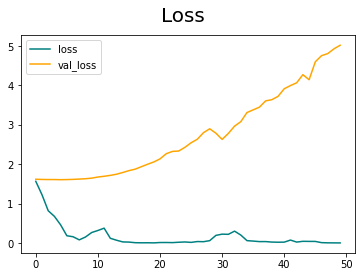

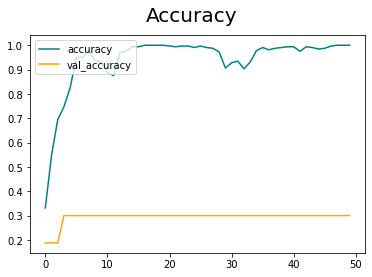

Precision: 0.23
Recall: 0.23
Acc: 0.23


In [ ]:
model.mob = TryPitch()